In [1]:
# importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\84sat\OneDrive\Desktop\CAREER FOUNDRY\4 Python Practice\1 Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\84sat\\OneDrive\\Desktop\\CAREER FOUNDRY\\4 Python Practice\\1 Instacart Basket Analysis'

In [5]:
# importing ords_prods_cust_merged file

In [6]:
ords_prods_customer = pd.read_pickle(os.path.join(path , '02 Data' , 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [7]:
ords_prods_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both


In [9]:
ords_prods_customer.shape

(32404859, 36)

In [10]:
# Question 2: PII data in dataset

In [11]:
# First name , Last name ,state , n_dependants , family_status are considered as PII data

In [12]:
# dropping unnessary columns

In [13]:
ords_prods_customer.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'user_id ',
       'first_order', 'add_to_cart_order', 'reordered', 'merge_indicator',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'family_status', 'income', '_merge'],
      dtype='object')

In [8]:
ords_prods_customer.drop(columns=['last_name', 'first_name', '_merge'], inplace=True)

In [9]:
ords_prods_customer.drop(columns=['busiest_day'], inplace=True)

In [10]:
ords_prods_customer.shape

(32404859, 32)

In [11]:
# Question 3:  Create a regional segmentation of the data.

In [12]:
ords_prods_customer.loc[ords_prods_customer['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] ='Northeast'

In [13]:
ords_prods_customer.loc[ords_prods_customer['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] ='Midwest'

In [14]:
ords_prods_customer.loc[ords_prods_customer['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] ='South'

In [15]:
ords_prods_customer.loc[ords_prods_customer['state'].isin(['Idaho' , 'Montana', 'Wyoming' ,'Nevada' ,'Utah' ,'Colorado' ,'Arizona' ,'New Mexico' ,'Alaska' ,'Washington' ,'Oregon' ,'California' ,'Hawaii']), 'region'] ='West'

In [22]:
ords_prods_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,family_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest


In [23]:
# Checking region frequency

In [24]:
ords_prods_customer.value_counts('region')

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
dtype: int64

In [25]:
ords_prods_customer.spending_flag

0           Low spender
1           Low spender
2           Low spender
3           Low spender
4           Low spender
               ...     
32404854    Low spender
32404855    Low spender
32404856    Low spender
32404857    Low spender
32404858    Low spender
Name: spending_flag, Length: 32404859, dtype: object

In [26]:
# Creating Spending_by_region Dataframe group by regions

In [27]:
spending_by_region = ords_prods_customer.groupby('region')['spending_flag'].value_counts().unstack()


In [28]:
spending_by_region.head()

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [29]:
# ploting bar chart

Text(0.5, 1.0, 'Spending Flag Distribution by Region')

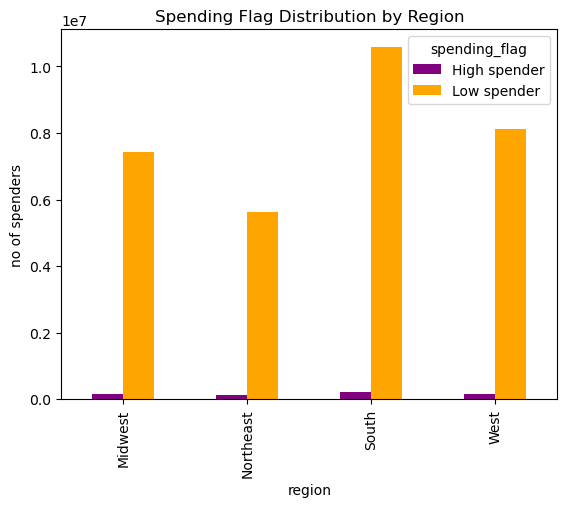

In [30]:
bar = spending_by_region.plot.bar(color =['purple', 'orange'])

bar.set_xlabel('region')
bar.set_ylabel('no of spenders')
bar.set_title('Spending Flag Distribution by Region')


In [31]:
# exporting spending flag distribution by region bar chart

In [32]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_dist_region.png'))

In [33]:
# total spent in Regions

In [34]:
spending_by_region1 = ords_prods_customer.groupby('region')['prices'].sum()

In [35]:
spending_by_region1.value_counts

<bound method IndexOpsMixin.value_counts of region
Midwest       96603658.7
Northeast     66126199.8
South        131613265.4
West          93874398.7
Name: prices, dtype: float64>

In [36]:
# creating bar chart for total spent in regions

In [37]:
regions = ['Midwest', 'Northeast', 'South', 'West']
sales = [96603658.7, 66126199.8, 131613265.4, 93874398.7]

In [38]:
# add text lable to bar chart

Text(0.5, 1.0, 'Spending Distribution by Region')

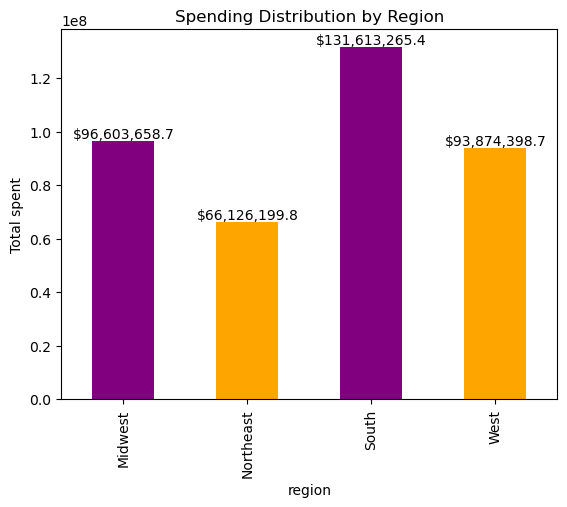

In [39]:
bar1 = spending_by_region1.plot.bar(color =['purple', 'orange'])


# add data lable to bar chart

for i in range(len(regions)):
    plt.text(i, sales[i] + 1000000, f'${sales[i]:,.1f}', ha='center')

bar1.set_xlabel('region')
bar1.set_ylabel('Total spent')
bar1.set_title('Spending Distribution by Region')


In [40]:
# exporting total spent in regions bar chart

In [41]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_in_region.png'))

In [42]:
# Question 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [16]:
# Create an exclusion flag column for low Activity customers


ords_prods_customer['exclude'] = ords_prods_customer['max_order'] < 5

In [17]:
ords_prods_customer.value_counts('exclude')

exclude
False    30964564
True      1440295
dtype: int64

In [18]:
# There 1440295 low activity customers

In [19]:
# Filter out low-activity customers

In [20]:
excluded_customers = ords_prods_customer[ords_prods_customer['exclude']]

In [21]:
excluded_customers.shape

(1440295, 34)

In [47]:
# Export excluded low-activity customers to a new pickle file

In [48]:
ords_prods_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_customers.pkl'))


In [49]:
# Remove low-activity customers from the original DataFrame

In [22]:
ords_prods_customer_clean = ords_prods_customer[~ords_prods_customer['exclude']]

In [23]:
ords_prods_customer_clean.shape

(30964564, 34)

In [50]:
# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [51]:
# Calculating summery statistics

In [52]:
ords_prods_customer_clean.describe().apply(lambda x: x.apply(lambda y: '{0:.5f}'.format(y)))


,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,user_id,add_to_cart_order,reordered,max_order,mean_product_price,median_days_between_orders,age,n_dependants,income
count,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,29303281.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000,30964564.00000
mean,25598.49534,71.18859,9.92236,11.93352,1710317.49557,102928.35133,17.83414,2.74140,13.41098,10.81030,102928.35133,8.36304,0.60610,34.42569,11.93352,9.95714,49.46803,1.50182,99675.86511
std,14080.96156,38.22194,6.28244,491.34440,987378.52243,59470.61319,17.63442,2.08925,4.24885,8.57859,59470.61319,7.13540,0.48861,24.89504,79.92284,6.66614,18.48528,1.11890,43141.86553
min,1.00000,1.00000,1.00000,1.00000,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,5.00000,1.00000,0.00000,18.00000,0.00000,25903.00000
25%,13544.00000,31.00000,4.00000,4.20000,855412.00000,51409.00000,5.00000,1.00000,10.00000,5.00000,51409.00000,3.00000,0.00000,14.00000,7.39289,6.00000,33.00000,1.00000,67292.00000
50%,25288.00000,83.00000,9.00000,7.40000,1710404.50000,102586.00000,12.00000,3.00000,13.00000,7.00000,102586.00000,6.00000,1.00000,28.00000,7.82514,7.00000,49.00000,2.00000,96765.00000
75%,37947.00000,107.00000,16.00000,11.30000,2565206.00000,154387.00000,25.00000,5.00000,16.00000,14.00000,154387.00000,11.00000,1.00000,48.00000,8.24960,12.50000,65.00000,3.00000,128102.00000
max,49688.00000,134.00000,21.00000,99999.00000,3421083.00000,206209.00000,99.00000,6.00000,23.00000,30.00000,206209.00000,145.00000,1.00000,99.00000,15006.94000,30.00000,81.00000,3.00000,593901.00000


In [53]:
# creating age category column if age <33 then young  if age >=33 & <65 middle age if age >=65 then senior

In [24]:
ords_prods_customer_clean.loc[ords_prods_customer_clean['age'] < 33, 'age_category'] = 'Young'


C:\Users\84sat\AppData\Local\Temp\ipykernel_22580\1300196220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_clean.loc[ords_prods_customer_clean['age'] < 33, 'age_category'] = 'Young'


In [25]:
ords_prods_customer_clean.loc[(ords_prods_customer_clean['age'] >= 33) & (ords_prods_customer_clean['age'] < 65), 'age_category'] = 'Middle aged'


In [26]:
ords_prods_customer_clean.loc[ords_prods_customer_clean['age'] >= 65, 'age_category'] = 'Senior'


In [27]:
ords_prods_customer_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,family_status,income,region,exclude,age_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior


In [28]:
# checking frequency of age_category

In [29]:
ords_prods_customer_clean['age_category'].value_counts()


Middle aged    15483886
Senior          8195544
Young           7285134
Name: age_category, dtype: int64

In [30]:
# creating income category (using summery statistics) column. If income <67292 then low_income  if income >=67292 & <96765 midium income 
#if income >96765 and <128102 then high income and if income >128102 then very high income

In [31]:
# create income flag

In [32]:
ords_prods_customer_clean.loc[ords_prods_customer_clean['income'] < 67000, 'income_category'] = 'Low income'


C:\Users\84sat\AppData\Local\Temp\ipykernel_22580\12098546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_clean.loc[ords_prods_customer_clean['income'] < 67000, 'income_category'] = 'Low income'


In [33]:
ords_prods_customer_clean.loc[(ords_prods_customer_clean['income'] >= 67000) & (ords_prods_customer_clean['income'] < 96700), 'income_category'] = 'Medium income'


In [34]:
ords_prods_customer_clean.loc[(ords_prods_customer_clean['income'] >= 96700) & (ords_prods_customer_clean['income'] < 128000), 'income_category'] = 'High income'


In [35]:
ords_prods_customer_clean.loc[ords_prods_customer_clean['income'] >= 128000, 'income_category'] = 'Very High income'


In [36]:
ords_prods_customer_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,family_status,income,region,exclude,age_category,income_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income


In [37]:
# check frequency of income_category

In [38]:
ords_prods_customer_clean['income_category'].value_counts()


Medium income       7795400
High income         7754569
Very High income    7753117
Low income          7661478
Name: income_category, dtype: int64

In [39]:
# create dependency flag

In [40]:
ords_prods_customer_clean.loc[ords_prods_customer_clean['n_dependants'] == 0, 'dependency_flag'] = 'Without dependants'


C:\Users\84sat\AppData\Local\Temp\ipykernel_22580\1917206919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_clean.loc[ords_prods_customer_clean['n_dependants'] == 0, 'dependency_flag'] = 'Without dependants'


In [41]:
ords_prods_customer_clean.loc[ords_prods_customer_clean['n_dependants'] > 0, 'dependency_flag'] = 'With dependants'


In [42]:
ords_prods_customer_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,age,date_joined,n_dependants,family_status,income,region,exclude,age_category,income_category,dependency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,81,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants


In [43]:
ords_prods_customer_clean['dependency_flag'].value_counts()


With dependants       23224883
Without dependants     7739681
Name: dependency_flag, dtype: int64

In [44]:
# create customer profile column using age_category, income_category , dependency_flag columns

In [45]:
ords_prods_customer_clean.dtypes


product_id                             int64
product_name                          object
aisle_id                               int64
department_id                          int64
prices                               float64
order_id                               int64
user_id                                int64
order_number                           int64
orders_day_of_week                     int64
order_hour_of_day                      int64
days_since_prior_order               float64
user_id                                int64
first_order                             bool
add_to_cart_order                      int64
reordered                              int64
merge_indicator                     category
price_range_loc                       object
busiest_days                          object
busiest_period_of_day                 object
max_order                              int64
loyalty_flag                          object
mean_product_price                   float64
spending_f

In [46]:
# Concatenate the values from the three columns

In [47]:

ords_prods_customer_clean.loc[:, 'customer_profile'] = ords_prods_customer_clean['age_category'] + '_' + ords_prods_customer_clean['income_category'] + '_' + ords_prods_customer_clean['dependency_flag']


C:\Users\84sat\AppData\Local\Temp\ipykernel_22580\3407434274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_clean.loc[:, 'customer_profile'] = ords_prods_customer_clean['age_category'] + '_' + ords_prods_customer_clean['income_category'] + '_' + ords_prods_customer_clean['dependency_flag']


In [48]:
ords_prods_customer_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,n_dependants,family_status,income,region,exclude,age_category,income_category,dependency_flag,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants,Senior_Low income_With dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants,Senior_Low income_With dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants,Senior_Low income_With dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants,Senior_Low income_With dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,2019-08-01,1,married,49620,Midwest,False,Senior,Low income,With dependants,Senior_Low income_With dependants


In [49]:
# check frequency of customer_profile

In [50]:
ords_prods_customer_clean['customer_profile'].value_counts()


Middle aged_Very High income_With dependants       3372816
Middle aged_High income_With dependants            3279833
Young_Medium income_With dependants                2546814
Young_Low income_With dependants                   2502069
Middle aged_Medium income_With dependants          2481315
Middle aged_Low income_With dependants             2448955
Senior_Very High income_With dependants            2370770
Senior_High income_With dependants                 2168798
Middle aged_Very High income_Without dependants    1156098
Middle aged_High income_Without dependants         1099515
Young_Low income_Without dependants                 840963
Senior_Medium income_With dependants                836158
Young_Medium income_Without dependants              833043
Middle aged_Low income_Without dependants           822928
Middle aged_Medium income_Without dependants        822426
Senior_Low income_With dependants                   797860
Senior_Very High income_Without dependants          7713

In [51]:
# reducing sample to only those columns necessary for the chart, namely “customer_profile” and “orders_day_of_week.

In [52]:
cust_profil_order_dow = ords_prods_customer_clean[['orders_day_of_week','customer_profile']]

In [53]:
cust_profil_order_dow.value_counts

<bound method DataFrame.value_counts of           orders_day_of_week                   customer_profile
0                          6  Senior_Low income_With dependants
1                          6  Senior_Low income_With dependants
2                          5  Senior_Low income_With dependants
3                          5  Senior_Low income_With dependants
4                          6  Senior_Low income_With dependants
...                      ...                                ...
32404843                   3  Senior_Low income_With dependants
32404844                   1  Senior_Low income_With dependants
32404845                   4  Senior_Low income_With dependants
32404846                   1  Senior_Low income_With dependants
32404847                   2  Senior_Low income_With dependants

[30964564 rows x 2 columns]>

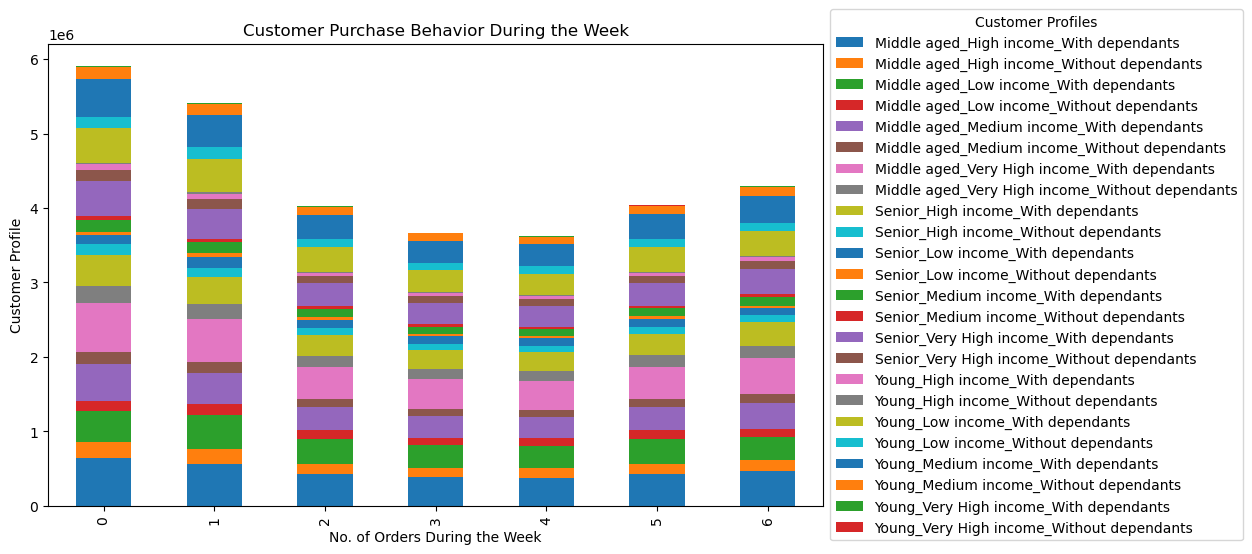

In [148]:

# Create the crosstab
crosstab5 = pd.crosstab(ords_prods_customer_clean['orders_day_of_week'], ords_prods_customer_clean['customer_profile'], dropna=False, margins=False)

# Plot the crosstab
customer_profile_odw1 = crosstab5.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and a title
customer_profile_odw1.set_xlabel('No. of Orders During the Week')
customer_profile_odw1.set_ylabel('Customer Profile')
customer_profile_odw1.set_title('Customer Purchase Behavior During the Week')

# Add a legend outside of the chart
customer_profile_odw1.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# Show the plot
plt.show()



In [149]:
customer_profile_odw1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_odw1.png'), bbox_inches='tight', pad_inches=0.1)

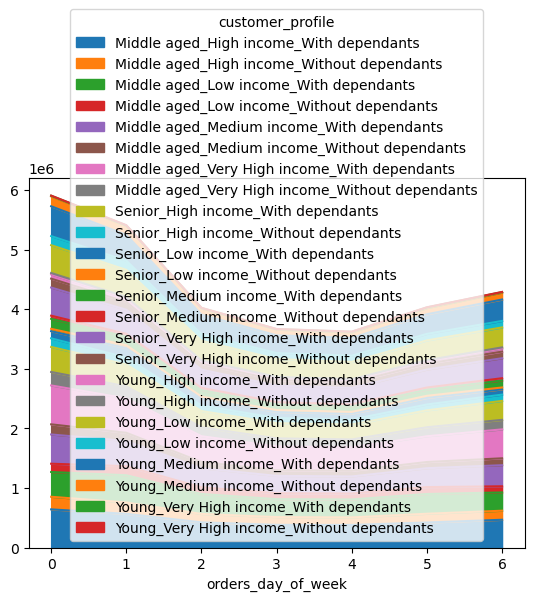

In [127]:
# Create a stacked area chart from crosstab data to visualize Customer purchase behavior
customer_profile_odw = crosstab5.plot.area()

In [117]:
# Save area chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer_odw_areaplot2.png'))
plt.show()  # Display the chart

<Figure size 640x480 with 0 Axes>

In [91]:
loyalty_customers = ords_prods_customer_clean.groupby(['loyalty_flag']).user_id.nunique() 

In [92]:
loyalty_customers.value_counts

<bound method IndexOpsMixin.value_counts of loyalty_flag
Loyal customer      17017
New customer        68750
Regular customer    76864
Name: user_id, dtype: int64>

Text(0.5, 1.0, 'Counts of Each Loyalty Flag')

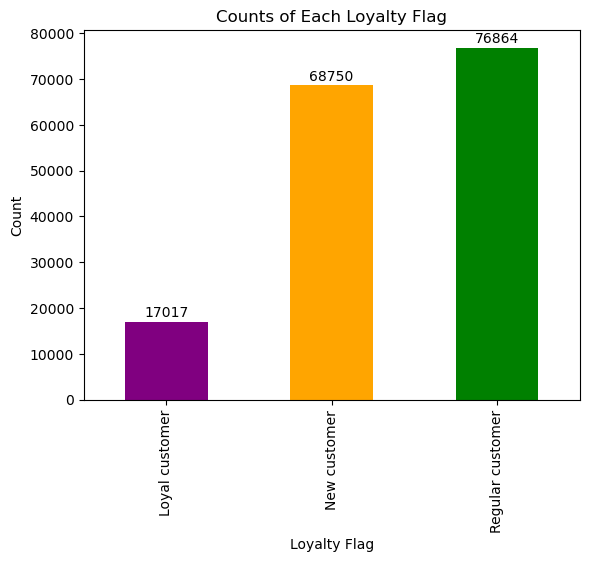

In [93]:
bar_loyalty_customer = loyalty_customers.plot.bar(color =['purple', 'orange', 'green'])


# add data lable to bar chart
loyalty_flags = ['Loyal customer', 'New customer', 'Regular customer']
counts = [17017, 68750, 76864]

for i, count in enumerate(counts):
    plt.text(i, count + 1000, str(count), ha='center')

bar_loyalty_customer.set_xlabel('Loyalty Flag')
bar_loyalty_customer.set_ylabel('Count')
bar_loyalty_customer.set_title('Counts of Each Loyalty Flag')


In [147]:
bar_loyalty_customer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_customer1.png'), bbox_inches='tight', pad_inches=0.1)

In [ ]:
# What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

Text(0.5, 1.0, 'Distribution of Users by Loyalty')

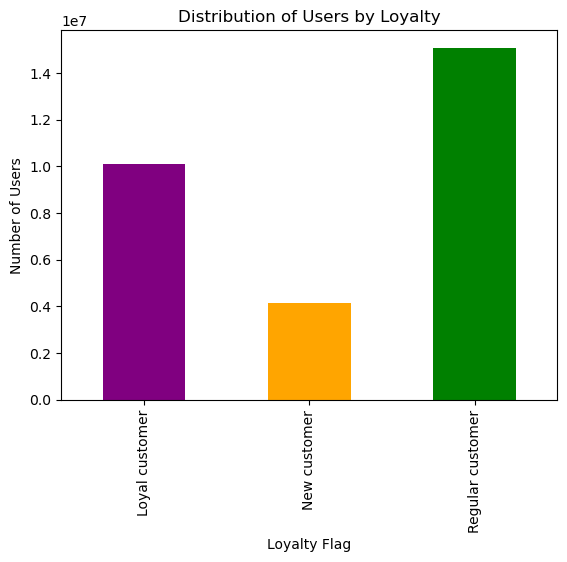

In [107]:

# Group by 'loyalty_flag' and count the occurrences of each value
loyalty_distribution = ords_prods_customer_clean.groupby('loyalty_flag')['days_since_prior_order'].count()

# Plot the distribution
loyalty_distribution.plot(kind='bar', color=['purple', 'orange', 'green'])

# Set labels and title
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Loyalty')



In [ ]:
# Are there differences in ordering habits based on a customer’s loyalty status


Text(0.5, 1.0, 'Average Number of Orders by Loyalty Status')

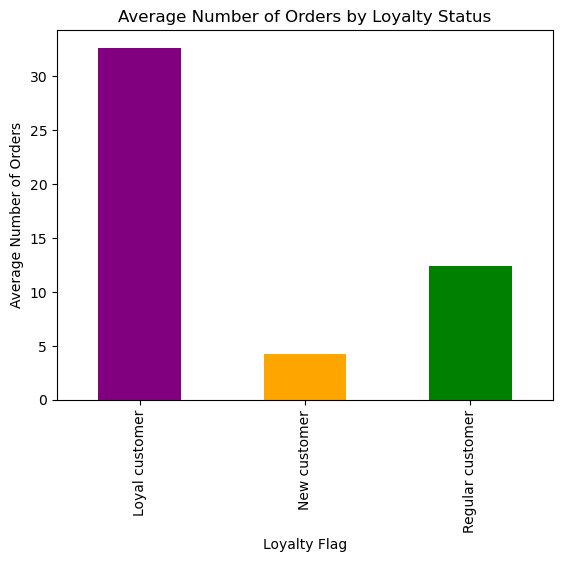

In [112]:
# Group the data by 'loyalty_flag' and calculate the average number of orders for each group
loyalty_order_stats = ords_prods_customer_clean.groupby('loyalty_flag')['order_number'].mean()

# plot bar graph
bar_loyalty_order_stats = loyalty_order_stats.plot.bar(color =['purple', 'orange', 'green'])

bar_loyalty_order_stats.set_xlabel('Loyalty Flag')
bar_loyalty_order_stats.set_ylabel('Average Number of Orders')
bar_loyalty_order_stats.set_title('Average Number of Orders by Loyalty Status')



In [113]:
bar_loyalty_order_stats.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_order_stats.png'), bbox_inches='tight', pad_inches=0.1)

[Text(0, 0, 'frozen'),
 Text(1, 0, 'other'),
 Text(2, 0, 'bakery'),
 Text(3, 0, 'produce'),
 Text(4, 0, 'alcohol'),
 Text(5, 0, 'international'),
 Text(6, 0, 'beverages'),
 Text(7, 0, 'pets'),
 Text(8, 0, 'dry goods pasta'),
 Text(9, 0, 'bulk'),
 Text(10, 0, 'personal care'),
 Text(11, 0, 'meat seafood'),
 Text(12, 0, 'pantry'),
 Text(13, 0, 'breakfast'),
 Text(14, 0, 'canned goods'),
 Text(15, 0, 'dairy eggs'),
 Text(16, 0, 'household'),
 Text(17, 0, 'babies'),
 Text(18, 0, 'snacks'),
 Text(19, 0, 'deli'),
 Text(20, 0, '')]

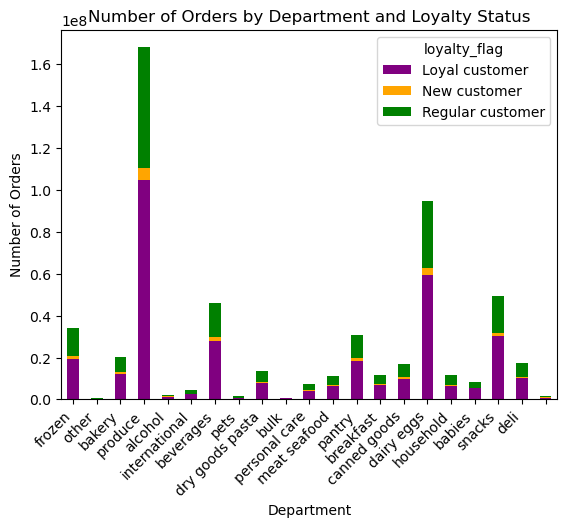

In [120]:


department_mapping = {1: "frozen", 2: "other", 3: "bakery", 4: "produce", 5: "alcohol", 6: "international", 7: "beverages",8: "pets",
    9: "dry goods pasta", 10: "bulk", 11: "personal care", 12: "meat seafood", 13: "pantry", 14: "breakfast", 15: "canned goods",
    16: "dairy eggs", 17: "household", 18: "babies", 19: "snacks", 20: "deli"
}


# Plotting the stacked bar chart
bar_department_loyalty_order_stats = department_loyalty_order_stats.plot(kind='bar', stacked=True, color=['purple', 'orange','green'])


# Adding labels and title using matplotlib methods
bar_department_loyalty_order_stats.set_xlabel('Department')
bar_department_loyalty_order_stats.set_ylabel('Number of Orders')
bar_department_loyalty_order_stats.set_title('Number of Orders by Department and Loyalty Status')

# Replace numerical labels with department names
bar_department_loyalty_order_stats.set_xticklabels([department_mapping.get(x, '') for x in department_loyalty_order_stats.index], rotation=45, ha='right')






In [121]:
bar_department_loyalty_order_stats.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_loyalty_order_stats.png'), bbox_inches='tight', pad_inches=0.1)

In [133]:
# popular Departments in Instacart

In [136]:
product_popularity = ords_prods_customer_clean.groupby('product_name')['order_number'].sum().sort_values(ascending=False)


In [137]:
product_popularity.value_counts

<bound method IndexOpsMixin.value_counts of product_name
Banana                                                          8100053
Bag of Organic Bananas                                          7734756
Organic Strawberries                                            4643769
Organic Baby Spinach                                            4218102
Organic Hass Avocado                                            4132377
                                                                 ...   
Select Roasted Lamb with Vegetables & Barley Dog Food Recipe          1
Spinach Cheese Rice Palak Paneer Dinner                               1
Organic ZFruit Rope Fruit Punch Flavor                                1
Original Fire Roasted Diced Green Chiles                              1
Cld/Flu Van Chrry                                                     1
Name: order_number, Length: 49630, dtype: int64>

In [138]:
top_10_products = product_popularity.head(10)

In [139]:
top_10_products

product_name
Banana                    8100053
Bag of Organic Bananas    7734756
Organic Strawberries      4643769
Organic Baby Spinach      4218102
Organic Hass Avocado      4132377
Organic Raspberries       2984503
Organic Whole Milk        2736035
Large Lemon               2712043
Organic Avocado           2711709
Strawberries              2515761
Name: order_number, dtype: int64

Text(0.5, 1.0, 'Instacart Popular Products')

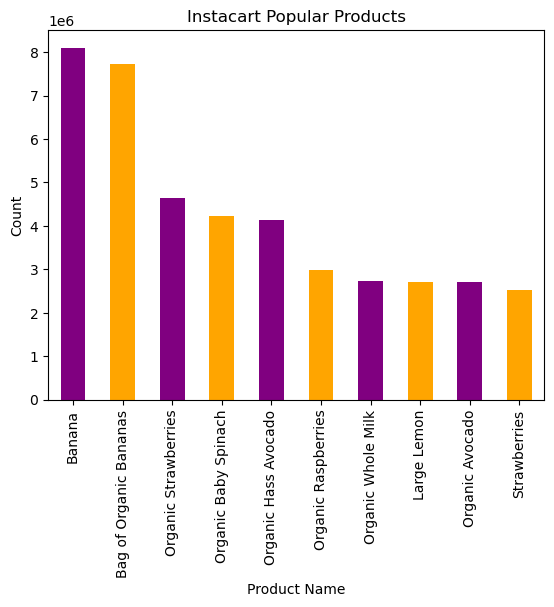

In [144]:
bar_popular_products = top_10_products.plot.bar(color =['purple', 'orange'])


# add data lable to bar chart
#loyalty_flags = ['Loyal customer', 'New customer', 'Regular customer']
#counts = [17017, 68750, 76864]

#for i, count in enumerate(counts):
   # plt.text(i, count + 1000, str(count), ha='center')

bar_popular_products.set_xlabel('Product Name')
bar_popular_products.set_ylabel('Count')
bar_popular_products.set_title('Instacart Popular Products')

#bar_popular_products.tight_layout()


In [145]:
bar_popular_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_popular_products1.png'), bbox_inches='tight', pad_inches=0.1)

In [148]:
# Department Popularity

In [150]:
department_popularity = ords_prods_customer_clean.groupby('department_id')['order_number'].sum().sort_values(ascending=False)


In [156]:
top_10_department = department_popularity.head(10)

In [157]:
top_10_department.value_counts

<bound method IndexOpsMixin.value_counts of department_id
4     167927778
16     94870281
19     49325997
7      46040831
1      34288740
13     30891281
3      20014199
20     17210535
15     17138317
9      13674604
Name: order_number, dtype: int64>

[Text(0, 0, 'produce'),
 Text(1, 0, 'dairy eggs'),
 Text(2, 0, 'snacks'),
 Text(3, 0, 'beverages'),
 Text(4, 0, 'frozen'),
 Text(5, 0, 'pantry'),
 Text(6, 0, 'bakery'),
 Text(7, 0, 'deli'),
 Text(8, 0, 'canned goods'),
 Text(9, 0, 'dry goods pasta')]

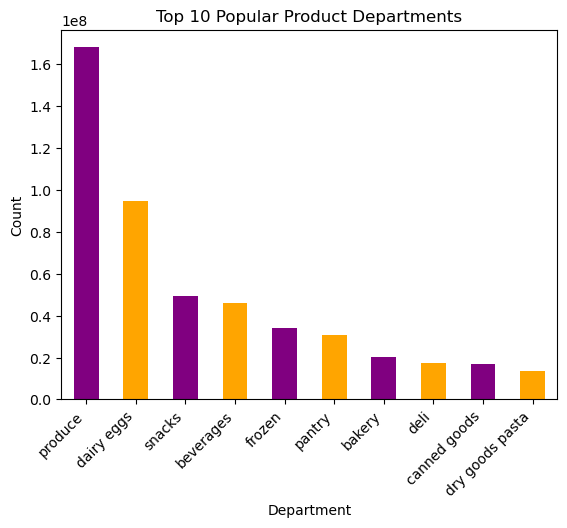

In [162]:
department_mapping = {1: "frozen", 2: "other", 3: "bakery", 4: "produce", 5: "alcohol", 6: "international", 7: "beverages",8: "pets",
    9: "dry goods pasta", 10: "bulk", 11: "personal care", 12: "meat seafood", 13: "pantry", 14: "breakfast", 15: "canned goods",
    16: "dairy eggs", 17: "household", 18: "babies", 19: "snacks", 20: "deli"
}


# Plotting the bar chart
top_10_department_bar = top_10_department.plot.bar(color=['purple', 'orange'])

# Adding labels and title using matplotlib methods
top_10_department_bar.set_xlabel('Department')
top_10_department_bar.set_ylabel('Count')
top_10_department_bar.set_title('Top 10 Popular Product Departments')

# Replace numerical labels with department names
top_10_department_bar.set_xticklabels([department_mapping.get(x, '') for x in top_10_department.index], rotation=45, ha='right')




In [163]:
top_10_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_popular_products_dept.png'), bbox_inches='tight', pad_inches=0.1)

In [54]:
# Group by customer_profile and calculate max, mean, and min for usage_frequency and expenditure
aggregated_data = ords_prods_customer_clean.groupby('customer_profile').agg({
    'days_since_prior_order': ['max', 'mean', 'min']})

In [58]:
aggregated_data

days_since_prior_order  \
                                                                   max   
customer_profile                                                         
Middle aged_High income_With dependants                           30.0   
Middle aged_High income_Without dependants                        30.0   
Middle aged_Low income_With dependants                            30.0   
Middle aged_Low income_Without dependants                         30.0   
Middle aged_Medium income_With dependants                         30.0   
Middle aged_Medium income_Without dependants                      30.0   
Middle aged_Very High income_With dependants                      30.0   
Middle aged_Very High income_Without dependants                   30.0   
Senior_High income_With dependants                                30.0   
Senior_High income_Without dependants                             30.0   
Senior_Low income_With dependants                                 30.0   
Senior_Low income_Without dependants                              30.0   
Senior_Medium income_With dependants                              30.0   
Senior_Medium income_Without dependants                           30.0   
Senior_Very High income_With dependants                           30.0   
Senior_Very High income_Without dependants                        30.0   
Young_High income_With dependants                                 30.0   
Young_High income_Without dependants                              30.0   
Young_Low income_With dependants                                  30.0   
Young_Low income_Without dependants                               30.0   
Young_Medium income_With dependants                               30.0   
Young_Medium income_Without dependants                            30.0   
Young_Very High income_With dependants                            30.0   
Young_Very High income_Without dependants                         30.0   

                                                                 
                                                      mean  min  
customer_profile                                                 
Middle aged_High income_With dependants          10.764239  0.0  
Middle aged_High income_Without dependants       10.733119  0.0  
Middle aged_Low income_With dependants           10.990190  0.0  
Middle aged_Low income_Without dependants        10.872737  0.0  
Middle aged_Medium income_With dependants        10.689213  0.0  
Middle aged_Medium income_Without dependants     10.800106  0.0  
Middle aged_Very High income_With dependants     10.845115  0.0  
Middle aged_Very High income_Without dependants  10.659576  0.0  
Senior_High income_With dependants               10.844815  0.0  
Senior_High income_Without dependants            10.751811  0.0  
Senior_Low income_With dependants                11.044838  0.0  
Senior_Low income_Without dependants             11.327066  0.0  
Senior_Medium income_With dependants             10.697439  0.0  
Senior_Medium income_Without dependants          10.403650  0.0  
Senior_Very High income_With dependants          10.711655  0.0  
Senior_Very High income_Without dependants       10.736049  0.0  
Young_High income_With dependants                11.061221  0.0  
Young_High income_Without dependants             10.944121  0.0  
Young_Low income_With dependants                 10.909983  0.0  
Young_Low income_Without dependants              10.973632  0.0  
Young_Medium income_With dependants              10.739672  0.0  
Young_Medium income_Without dependants           10.829463  0.0  
Young_Very High income_With dependants            9.956094  0.0  
Young_Very High income_Without dependants        10.250535  0.0

In [70]:
aggregat_data = ords_prods_customer_clean.groupby('customer_profile').agg({
    'days_since_prior_order': [ 'mean']})

In [80]:

aggregat_data


,days_since_prior_order
,mean
customer_profile,
Middle aged_High income_With dependants,10.764239
Middle aged_High income_Without dependants,10.733119
Middle aged_Low income_With dependants,10.990190
Middle aged_Low income_Without dependants,10.872737
Middle aged_Medium income_With dependants,10.689213
Middle aged_Medium income_Without dependants,10.800106
Middle aged_Very High income_With dependants,10.845115
Middle aged_Very High income_Without dependants,10.659576


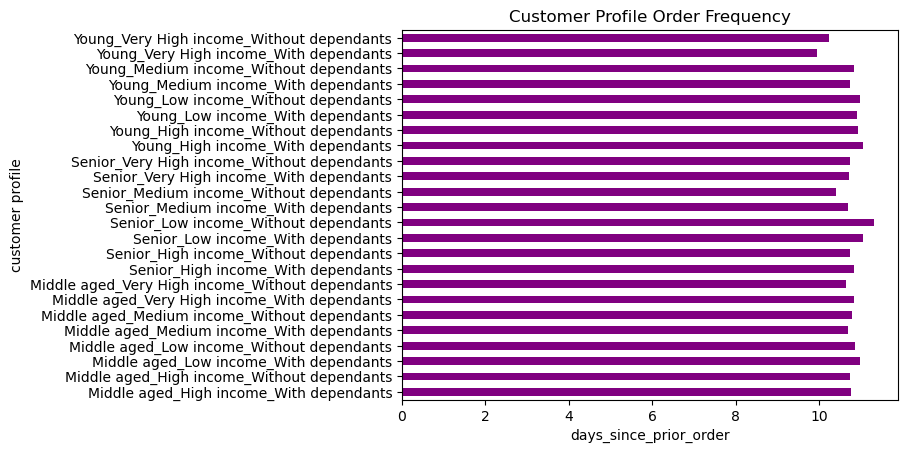

In [75]:
bar_cust_profile1 = aggregat_data.plot.barh(color =['purple'])

bar_cust_profile1.set_xlabel('days_since_prior_order')
bar_cust_profile1.set_ylabel('customer profile')
bar_cust_profile1.set_title('Customer Profile Order Frequency')

bar_cust_profile1.legend().remove()


In [88]:
bar_cust_profile1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile1.png'), bbox_inches='tight', pad_inches=0.1)

In [56]:
aggregated_data_exp = ords_prods_customer_clean.groupby('customer_profile').agg({
    'prices': ['mean']})

In [178]:
aggregated_data_exp

,prices
,mean
customer_profile,
Middle aged_High income_With dependants,8.966783
Middle aged_High income_Without dependants,10.479951
Middle aged_Low income_With dependants,7.189989
Middle aged_Low income_Without dependants,7.188016
Middle aged_Medium income_With dependants,8.843544
Middle aged_Medium income_Without dependants,8.315353
Middle aged_Very High income_With dependants,20.601596
Middle aged_Very High income_Without dependants,19.515719


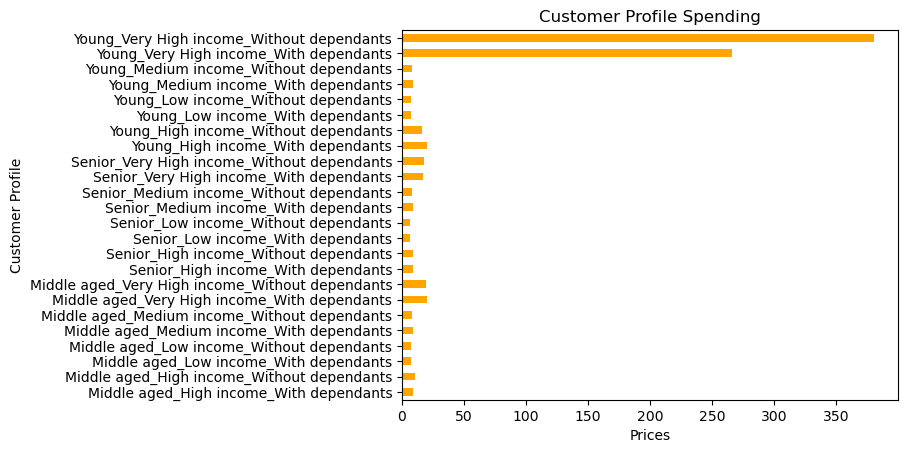

In [87]:



# Create the horizontal bar chart
bar_aggregated_data_exp = aggregated_data_exp.plot.barh(color=['Orange'])


# Set labels and title
bar_aggregated_data_exp.set_xlabel('Prices')
bar_aggregated_data_exp.set_ylabel('Customer Profile')
bar_aggregated_data_exp.set_title('Customer Profile Spending')

# Remove legend
bar_aggregated_data_exp.legend().remove()





In [89]:
bar_aggregated_data_exp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_aggregated_data_exp.png'), bbox_inches='tight', pad_inches=0.1)

In [ ]:
9.What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


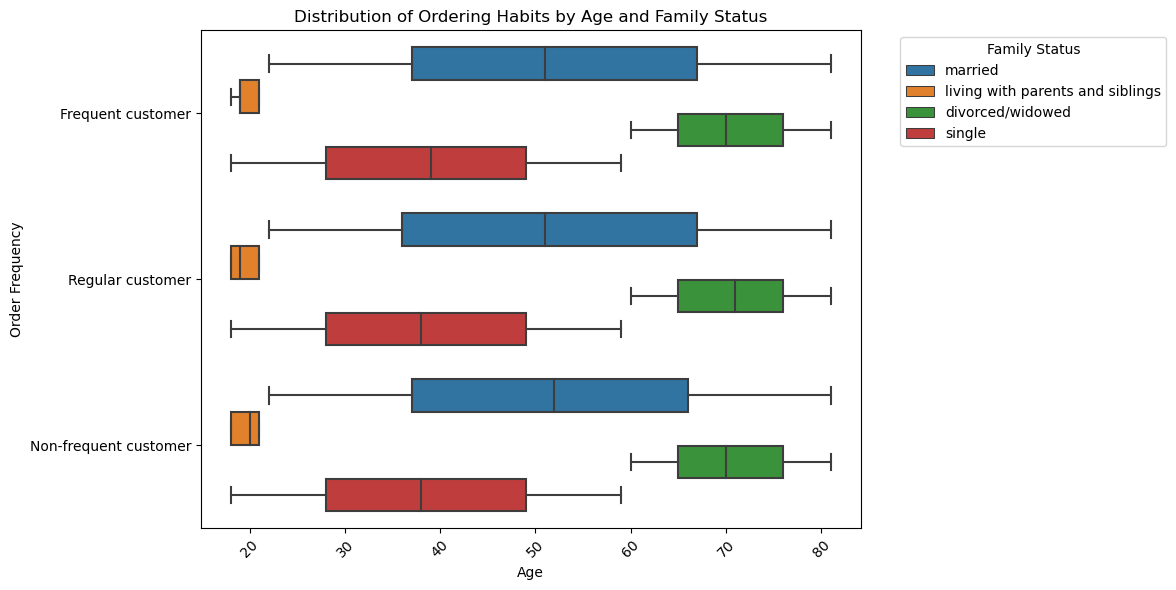

In [131]:
# Visualize distribution of ordering habits by age and family status
plt.figure(figsize=(12, 6))

order_age_family = sns.boxplot(x='age', y='order_frequency', hue='family_status', data=ords_prods_customer_clean)

plt.xlabel('Age')
plt.ylabel('Order Frequency')
plt.title('Distribution of Ordering Habits by Age and Family Status')
plt.xticks(rotation=45)
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside of the chart
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [132]:
order_age_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_age_family.png'), bbox_inches='tight', pad_inches=0.1)

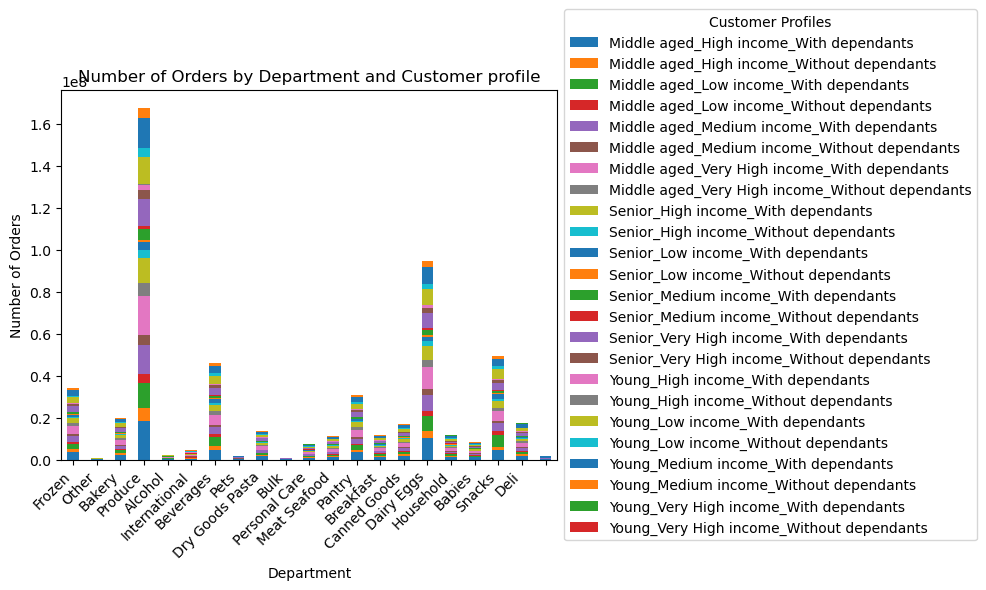

In [152]:

department_cust_profile = ords_prods_customer_clean.groupby(['department_id', 'customer_profile'])['order_number'].sum().unstack()

# Plotting the stacked bar chart
bar_department_cust_profile = department_cust_profile.plot(kind='bar', stacked=True)

# Adding labels and title using matplotlib methods
bar_department_cust_profile.set_xlabel('Department')
bar_department_cust_profile.set_ylabel('Number of Orders')
bar_department_cust_profile.set_title('Number of Orders by Department and Customer profile')

# Replace numerical labels with department names
bar_department_cust_profile.set_xticklabels([department_mapping.get(x, '') for x in department_cust_profile.index], rotation=45, ha='right')

bar_department_cust_profile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')


plt.show()

